<center><h1>Predictive Modeling: Logistic Regression - Medical Data - D208<br>
Jessenia Lorenzo<br>
Western Governor's University<br>
__________________________________________________________________________________________________________</h1></center>

<h1><center>Part 1</center></h1>

The objective of this analysis is to see what is the relationship between patient readmission based on the predictor variables High Blood, Stroke, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Allergic_rhinitis, Reflux_esophagitis, and which are the most significant in predicting readmission?

To do this, logistic regression will be performed to determine, if any, the relationship between readmission and high blood pressure, stroke, overweight, arthritis diabetes, hyperlipidemia, back pain, allergic rhinitis, ad reflux esophagitis.

ReAdmission rates are crucial to understanding the measurement and depth of care a patient receives. Furthermore, lower readmission rates can grant the opportunity to lower health care costs, quality improvement, and patient satisfaction. Finally, less readmissions, on a patient level, also means less nosocomial (hospital-acquired) infections, medical errors, and more. To sum it all, understanding, communications, and diagnosing the patient correct to treat their illnesses can mean decreased readmission rates.

<h1><center>Part 2</center></h1>

There are 6 assumptions:
- The response variable is binary (2 possible outcomes)
    - This is simply done by counting how many uniue outcomes occur in the response variable.
    - If in case there were more than 2 outcomes, an ordinal regression would be performed instead.
    - This assumption passed.
- Observations are independent
    - Logistic regression assumes each variables are independent from each other.
    - To check for this assumption, plots are created to observe for random patterns.
    - If there is not a random pattern, assumption may be violated.
    - This assumption failed since there were no random patterns.
- No multicollinearity among the explaratory variables.
    - If there is a high degree of correlation between variables, it can cause problems.
    - VIF can determine this by measuring the correlation and strength of correlation between the predictor variables in the model. 
- No extreme outliers
    - Boxplots are done for this. 
        - If there are outliers, there are options to dealing with them. Some options include removing them, replace them with mean or median, or keeping them, noting them when reporting regression results. In this case, I kept the stroke variable, and simply removed it from my reduced model.
- A linear relationship between explanatory variables and logit of the response variable.
    - plots are created to take a better look 
- The sample size is large enough
    - Check for a minimum of 10 cases with the least frequent outcome for each explanatory variable.
    - This assumption passed.

Tool Benefits:
Benefits of using Python for data analysis include flexibility, ease to learn, it's free and open source, well-supported since it's internationally used, and great for data cleaning, exploration, modeling, machine learning, visualizations, and reporting. In addition, Python has many great tools, packages, and can be used for multiple purposes (Terra, 2021).

Appropriate Technique:
The benefits of logistic regression data analysis: Some benefits include simplicity of implementation, interpretation, and efficiency in training. Furthermore, it can easily be extended to multinomial regression if needed, provides measures of coefficient size and its directionality of association (positive or negative), is efficient in classifying unknown values, is accurate, and can interpret model coefficients to indicate feature importance. Furthermore, logistic regression is used when the chosen Y variables can only takes two values such as 1 and 2, yes and no, etc. Also, it is used when the data is linearly separable to be classified into two independent classes. Lastly, it uses algorithms to classify incoming data using historical data. The algorithms improve more efficiently when newer data constantly comes in (Advantages and disadvantages of logistic regression 2022).

<h1><center>Part 3</center></h1>

Steps to preparing the data:
- Import the medical dataset file
- Check for missing/null values
- Replace missing/null values, if any, with the mean
- Check that all data types are correct to proceed for the regression
- Check the summary statistics of the data
 - count: there are 10,000 observations in each variable
 - unique: 2 is the number in common for all of the variables
 - top: the top is "No" for all except overweight, which is "Yes"
 - frequent: 
     - ReAdmis: 6331, 	HighBlood: 5910,	Stroke: 8007,	Overweight: 7094,	Arthritis: 6426,	Diabetes: 7262,	Hyperlipidemia: 6628,	BackPain: 5886,	Allergic_rhinitis: 6059,	Reflux_esophagitis:  5865
- drop the irrelevant variables that will not be used for the logistic regression
- From the results of the summary statistics, I predict that the R2 will be low and the regression liness will down slope because of the outlier in stroke.
- No null values were found. Success!
- All of the data types turned out to be consistent and fit perfectly for the logistic regression.
- Bivariate and Univariate Distributions (seen below)

### Importing the libraries 
(reference: statology.org)

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

### Reading in and viewing the churn data set

In [3]:
df = pd.read_csv(r'C:\Users\dre2\Desktop\WGU\D208\churn_clean.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dre2\\Desktop\\WGU\\D208\\churn_clean.csv'

In [ ]:
#Drop columns we dont need, look for nulls/replace as needed.
df = df.drop(columns=['City', 'State', 'County', 'Zip', 'Lat', 'Lng', 
                      'Population', 'Area', 'TimeZone', 'Job', 'Email', 'Contacts', 'Techie', 'Contract', 'Port_modem', 'Tablet', 
                      'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                      'Tenure', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'PaymentMethod', 'Marital'])
nulls = df.isnull().any()
print(nulls)

#### Statistical Summary

In [4]:
df.describe()

CaseOrder    Children           Age         Income  \
count  10000.00000  10000.0000  10000.000000   10000.000000   
mean    5000.50000      2.0877     53.078400   39806.926771   
std     2886.89568      2.1472     20.698882   28199.916702   
min        1.00000      0.0000     18.000000     348.670000   
25%     2500.75000      0.0000     35.000000   19224.717500   
50%     5000.50000      1.0000     53.000000   33170.605000   
75%     7500.25000      3.0000     71.000000   53246.170000   
max    10000.00000     10.0000     89.000000  258900.700000   

       Outage_sec_perweek  Yearly_equip_failure  MonthlyCharge  \
count        10000.000000          10000.000000   10000.000000   
mean            10.001848              0.398000     172.624816   
std              2.976019              0.635953      42.943094   
min              0.099747              0.000000      79.978860   
25%              8.018214              0.000000     139.979239   
50%             10.018560              0.000000     167.484700   
75%             11.969485              1.000000     200.734725   
max             21.207230              6.000000     290.160419   

       Bandwidth_GB_Year  
count       10000.000000  
mean         3392.341550  
std          2185.294852  
min           155.506715  
25%          1236.470827  
50%          3279.536903  
75%          5586.141370  
max          7158.981530

##### There are 10,000 observations in each variable in total.
##### Each variable has its mean state above as well as standard deviation, minimum number, 25%, 50%, 75%, and maximum.

#### Dummy Coding those vairables that we are using that are not in the format we need for our analysis

In [5]:
df['gender_dummy'] = [1 if v == 'Female' else 0 for v in df['Gender']]
df['churn_dummy'] = [1 if v == 'Yes' else 0 for v in df['Churn']]

In [1]:
df.head()

NameError: name 'df' is not defined

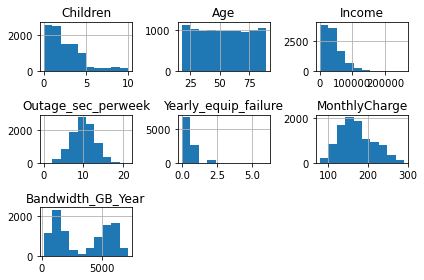

In [7]:
df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge',
'Bandwidth_GB_Year']].hist()
plt.tight_layout()

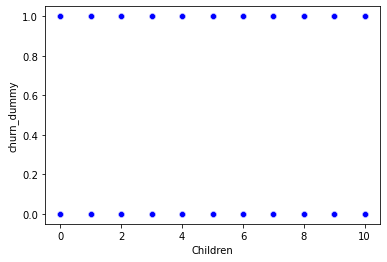

In [8]:
sns.scatterplot(x=df['Children'], y=df['churn_dummy'], color='blue')
plt.show();


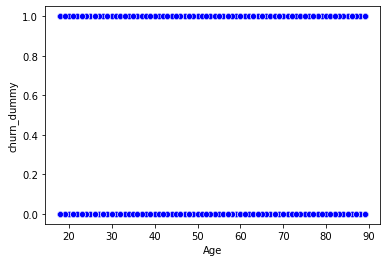

In [9]:
sns.scatterplot(x=df['Age'], y=df['churn_dummy'], color='blue')
plt.show();

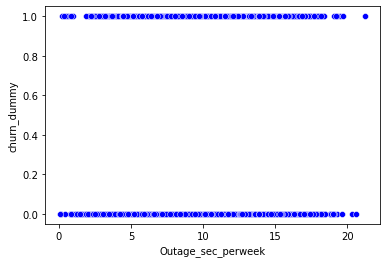

In [10]:
sns.scatterplot(x=df['Outage_sec_perweek'], y=df['churn_dummy'], color='blue')
plt.show();

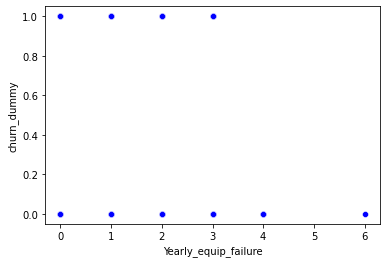

In [11]:
sns.scatterplot(x=df['Yearly_equip_failure'], y=df['churn_dummy'], color='blue')
plt.show();

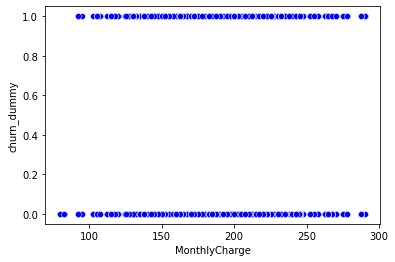

In [12]:
sns.scatterplot(x=df['MonthlyCharge'], y=df['churn_dummy'], color='blue')
plt.show();

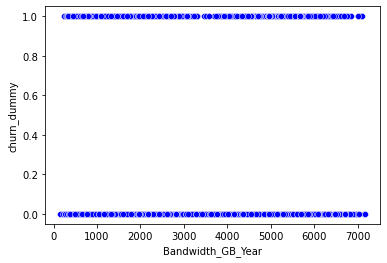

In [13]:
sns.scatterplot(x=df['Bandwidth_GB_Year'], y=df['churn_dummy'], color='blue')
plt.show();

In [14]:
df['Intercept'] = 1
log_reg_results = sm.Logit(df['churn_dummy'], df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'gender_dummy', 'Intercept']]).fit()
print(log_reg_results.summary())

Optimization terminated successfully.
         Current function value: 0.357089
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            churn_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:                  0.3824
Time:                        12:18:04   Log-Likelihood:                -3570.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                 0.0170      0.014      1.211      0.226      -0.010       0.044

In [15]:
df['Intercept'] = 1
log_reg_results2 = sm.Logit(df['churn_dummy'], df[['MonthlyCharge', 'Bandwidth_GB_Year', 'gender_dummy', 'Intercept']]).fit()
print(log_reg_results2.summary())

Optimization terminated successfully.
         Current function value: 0.357282
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            churn_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:                  0.3821
Time:                        12:18:04   Log-Likelihood:                -3572.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
MonthlyCharge         0.0342      0.001     38.701      0.000       0.032       0.036
Bandwidt

In [16]:
df.to_csv(r'C:\Users\dre2\Desktop\WGU\D208\D208 Task2\d208_task2_data.csv')

In [17]:
newdf = pd.read_csv(r'C:\Users\dre2\Desktop\WGU\D208\D208 Task2\d208_task2_data.csv')
print(newdf)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999        9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                           

In [18]:
matrix_df = pd.read_csv(r'C:\Users\dre2\Desktop\WGU\D208\D208 Task2\d208_task2_data.csv')

matrix_df = matrix_df[['Children', 'Intercept', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'gender_dummy', 'churn_dummy']]

X = matrix_df.iloc[:, 1:-1].values
y = matrix_df.iloc[:, -1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)


[[1289  197]
 [ 210  304]]


<AxesSubplot:>

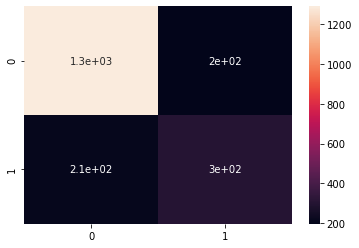

In [23]:
 y_predict_test = classifier.predict(X_test)
new_matrix = confusion_matrix(y_test, y_predict_test)
sns.heatmap(new_matrix, annot=True)


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1486
           1       0.61      0.59      0.60       514

    accuracy                           0.80      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.79      0.80      0.80      2000

